In [1474]:
import pandas as pd

In [1475]:
df = pd.read_csv('Codebasics_3_4th_Intership\project_resources1\survey_results.csv')

In [1476]:
df.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250


In [1477]:
df.shape

(30010, 17)

In [1478]:
df.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          8
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

In [1479]:
df['consume_frequency(weekly)'].mode()

0    3-4 times
Name: consume_frequency(weekly), dtype: object

In [1480]:
df['purchase_channel'].mode()

0    Online
Name: purchase_channel, dtype: object

# Remove Duplicates

In [1481]:
df.duplicated().sum()

10

In [1482]:
df[df.duplicated()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,None,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,None,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,None,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [1483]:
df.drop_duplicates( keep='first',inplace=True)

In [1484]:
df.shape

(30000, 17)

# Outlier Detection

In [1485]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


In [1486]:
df.age.max()

604

In [1487]:
df.age.value_counts()

19     1352
22     1327
18     1320
25     1314
23     1306
       ... 
457       1
267       1
285       1
192       1
203       1
Name: age, Length: 61, dtype: int64

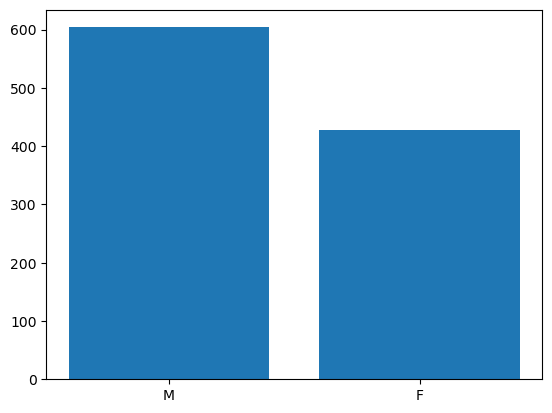

In [1488]:
import matplotlib.pyplot as plt
plt.bar(df.gender,df.age)
plt.show()


<Axes: >

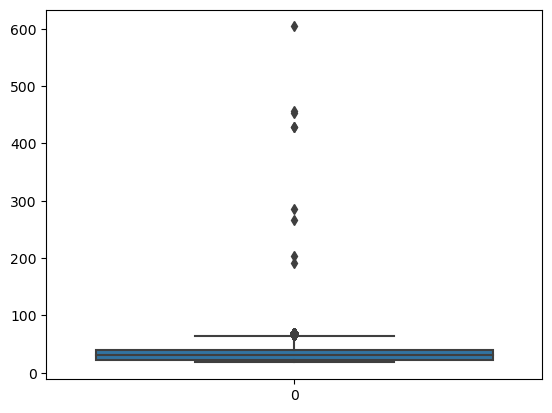

In [1489]:
import seaborn as sns
sns.boxplot(df.age)

In [1490]:
Q1, Q3 = df.age.quantile([0.25,0.75])
Q1, Q3

(23.0, 40.0)

In [1491]:
IQR = Q3 - Q1
IQR

17.0

In [1492]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(-2.5, 65.5)

In [1493]:
df[((df.age<lower)|(df.age>upper))] #outlier

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
71,R00072,70,F,Urban,Entrepreneur,<10L,3-4 times,Established,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),Casual (eg. At home),150-200
117,R00118,68,F,Metro,Retired,10L - 15L,5-7 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200
215,R00216,67,M,Metro,Entrepreneur,10L - 15L,5-7 times,Established,Medium (500 ml),above 4,Availability,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
304,R00305,66,F,Rural,Retired,<10L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
392,R00393,69,F,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29872,R29863,66,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
29942,R29933,70,M,Semi-Urban,Retired,16L - 25L,5-7 times,Established,Small (250 ml),0 to 1,Brand Reputation,Exotic,Online,Simple,Low (Not very concerned),Casual (eg. At home),100-150
29944,R29935,67,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),200-250
29985,R29976,70,F,Urban,Retired,<10L,3-4 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200


In [1494]:
df[((df.age>lower)|(df.age<upper))]   #data

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,None,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,R29996,29,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200
30006,R29997,42,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250
30007,R29998,57,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200
30008,R29999,23,M,Urban,Working Professional,16L - 25L,5-7 times,Established,Small (250 ml),above 4,Quality,Exotic,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200


In [1495]:
#df = df[((df.age>lower)&(df.age<upper))].dropna()
# Drop age which greater than 100
df = df[df['age'] < 100]

In [1496]:
df.shape

(29991, 17)

In [1497]:
df.describe()

,age
count,29991.000000
mean,32.947484
std,11.906077
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,70.000000


<Axes: >

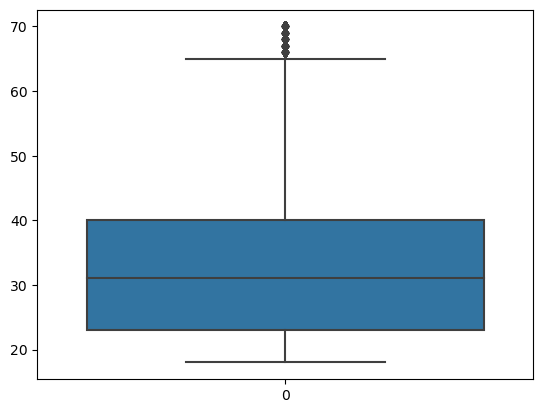

In [1498]:
sns.boxplot(df.age)

# Handling Missing Data

In [1499]:
df.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          8
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

# Correcting Spelling Mistakes

In [1500]:
df.zone.unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [1501]:
df.zone.value_counts()

Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: zone, dtype: int64

In [1502]:
#df= df[~df['zone'].isin(['urbna', 'Metor'])]
# Replace incorrect values
df['zone'] = df['zone'].replace({'urbna': 'Urban', 'Metor': 'Metro'})

In [1503]:
df.current_brand.unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [1504]:
df.current_brand.value_counts()

Established    15442
Newcomer       14499
newcomer          30
Establishd        20
Name: current_brand, dtype: int64

In [1505]:
#df= df[~df['current_brand'].isin(['newcomer', 'Establishd'])]
df['current_brand']= df['current_brand'].replace({'newcomer': 'Newcomer', 'Establishd': 'Established'})

In [1506]:
df.shape

(29991, 17)

# Feature Engineering

# Categorize Age into Age Groups

Objective: Create a new column `age_group` by categorizing the existing `age`
column into specific age ranges.
● Categorize ages into the following groups:
○ 18-25
○ 26-35
○ 36-45
○ 46-55
○ 56-70
○ 70+
● Ensure that each age in the dataset is mapped to one of these age groups.
● After that, remove the original `age` column from the dataset.


In [1507]:
df.age.unique()

array([30, 46, 41, 33, 23, 22, 45, 31, 27, 49, 44, 19, 24, 32, 56, 54, 37,
       63, 52, 40, 35, 21, 34, 26, 18, 20, 25, 39, 53, 28, 59, 36, 50, 29,
       43, 42, 38, 70, 51, 68, 48, 62, 60, 65, 47, 67, 64, 55, 66, 57, 61,
       69, 58], dtype=int64)

In [1508]:
def cal_age_group(row):
    if row >=18 and row<=25:
        return '18-25'
    elif row >=26 and row<=35:
        return '26-35'
    elif row >=36 and row<=45:
        return '36-45'
    elif row >=46 and row<=55:
        return '46-55'
    elif row >=56 and row<=70:
        return '56-70'
    else:
        return '70+'

In [1509]:
df['age'].apply(cal_age_group)

0        26-35
1        46-55
2        36-45
3        26-35
4        18-25
         ...  
30005    26-35
30006    36-45
30007    56-70
30008    18-25
30009    26-35
Name: age, Length: 29991, dtype: object

In [1510]:

df['age_group'] = df['age'].apply(cal_age_group)
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,23,M,Metro,Student,None,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [1511]:
df = df.drop(columns='age')

In [1512]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,None,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


# Step 2: Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)

Objective: Create a new column `cf_ab_score` by combining the information from
`consume_frequency(weekly)` and `awareness_of_other_brands` columns.
● Use the following mappings for consume_frequency(weekly):
○ "0-2 times" → 1
○ "3-4 times" → 2
○ "5-7 times" → 3
● Use the following mappings for awareness_of_other_brands:
○ "0 to 1" → 1
○ "2 to 4" → 2
○ "above 4" → 3
● Calculate cf_ab_score using the following formula:
● Round the result to two decimal places.



In [1513]:
df['consume_frequency(weekly)'].unique()

array(['3-4 times', '5-7 times', '0-2 times', nan], dtype=object)

In [1514]:
df['awareness_of_other_brands'].unique()

c:\Users\umark\anaconda3\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array(['0 to 1', '2 to 4', 'above 4'], dtype=object)

In [1515]:
# Map values using a dictionary
'''mapping = {'0-2 times':1,'3-4 times':2, '5-7 times':3}
df['frequency score'] = df['consume_frequency(weekly)'].map(mapping)
df.head(3)'''

"mapping = {'0-2 times':1,'3-4 times':2, '5-7 times':3}\ndf['frequency score'] = df['consume_frequency(weekly)'].map(mapping)\ndf.head(3)"

In [1516]:
df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].map({'0-2 times': 1, '3-4 times': 2, '5-7 times': 3})
df['awareness_of_other_brands'] = df['awareness_of_other_brands'].map({'0 to 1' : 1, '2 to 4' : 2, 'above 4' : 3})
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,2.0,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,3.0,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,2.0,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,3.0,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,None,2.0,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [1517]:
df['cf_ab_score'] = (df['consume_frequency(weekly)'] / (df['consume_frequency(weekly)'] + df['awareness_of_other_brands'])).round(2)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,2.0,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,3.0,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,2.0,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,3.0,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,None,2.0,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


In [1518]:
df['cf_ab_score'].max()

0.75

# Step 3: Create Zone Affluence Score (ZAS)

Objective: Calculate the `zas_score` using a combination of the `zone` and
`income_levels` columns.
● Use the following mappings for the zone column:
○ "Urban" → 3
○ "Metro" → 4
○ "Rural" → 1
○ "Semi-Urban" → 2
● Use the following mappings for the income_levels column:
○ "<10L" → 1
○ "10L - 15L" → 2
○ "16L - 25L" → 3
○ "26L - 35L" → 4
○ "> 35L" → 5
○ "Not Reported" → 0
● Calculate the zas_score using the following formula:

In [1519]:
df.zone.unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [1520]:
def strip_income_leve(text):
    return text.replace(' ', '')

strip_income_leve('> 35L')

'>35L'

In [1521]:
df['income_levels'] = df['income_levels'].apply(strip_income_leve)

In [1522]:
df['income_levels'].unique()

array(['<10L', '>35L', '16L-25L', 'None', '10L-15L', '26L-35L'],
      dtype=object)

In [1523]:
df['zone'] = df['zone'].map({"Rural" :1, "Urban" :3, "Semi-Urban" :2, "Metro" :4})
df['income_levels'] = df['income_levels'].map({"<10L": 1, "10L-15L":2, "16L-25L":3, "26L-35L":4, ">35L":5, "None":0})
df['zas_score'] = df['zone'] * df['income_levels']
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,3,Working Professional,1,2.0,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,4,Working Professional,5,3.0,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,1,Working Professional,5,2.0,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,3,Working Professional,3,3.0,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,4,Student,0,2.0,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [1524]:
df.zas_score.unique()

array([ 3, 20,  5,  9,  0,  6, 12,  2,  4,  8, 15, 16,  1, 10],
      dtype=int64)

In [1525]:
df['zas_score'].nunique()

14

# Step 4: Brand Switching Indicator (BSI)

Objective: Create a binary indicator column `bsi` that identifies if a respondent is
likely to switch brands.
codebasics.io
● Check if the respondent’s current_brand is not "Established".
● Also check if the reasons_for_choosing_brands are either "Price" or
"Quality".
● If both conditions are true, assign a value of 1 to indicate potential for brand
switching. Otherwise, assign 0.


In [1526]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score'],
      dtype='object')

In [1527]:
df['bsi'] =((df['current_brand'] != 'Established') & (df['reasons_for_choosing_brands'].isin(['Price', 'Quality']))).astype(int)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2.0,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3.0,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2.0,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3.0,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2.0,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [1528]:
df['current_brand'].isna().sum(), df['reasons_for_choosing_brands'].isna().sum()

(0, 0)

In [1529]:
df['bsi'].isna().sum()

0

# Final Cleaning Step:

Removing Logical Outliers:
● When reviewing the occupation data, we found logical inconsistencies. For
instance, there are students listed in the `56-70` age group, which seems like an
incorrect entry. We need to remove such records where the data doesn't make
sense logically.


In [1530]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [1531]:
df.groupby(['age_group','occupation'])[['occupation']].count()

occupation
age_group occupation                      
18-25     Entrepreneur                 535
          Student                     7328
          Working Professional        2605
26-35     Entrepreneur                1826
          Student                      697
          Working Professional        6570
36-45     Entrepreneur                1619
          Working Professional        4353
46-55     Entrepreneur                 799
          Working Professional        2167
56-70     Entrepreneur                 221
          Retired                     1130
          Student                       35
          Working Professional         106

In [1532]:
df = df[~((df['age_group'] == '56-70') & (df['occupation']=='Student'))]
print(df.shape)
df.head()

(29956, 20)


,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2.0,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,4,Working Professional,5,3.0,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,1,Working Professional,5,2.0,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,3,Working Professional,3,3.0,Newcomer,Medium (500 ml),1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,4,Student,0,2.0,Established,Medium (500 ml),1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [1533]:
df['bsi'].value_counts()

0    20796
1     9160
Name: bsi, dtype: int64

# Prepare Features and Target Variables

In [1534]:
df.columns

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range', 'age_group',
       'cf_ab_score', 'zas_score', 'bsi'],
      dtype='object')

In [1535]:
X = df.drop(columns=['respondent_id','price_range'],axis=1)
X.head(2)

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,3,Working Professional,1,2.0,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.67,3,1
1,F,4,Working Professional,5,3.0,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,20,0


In [1536]:
y=df['price_range']
y.head()

0    100-150
1    200-250
2    200-250
3    150-200
4     50-100
Name: price_range, dtype: object

# Data Splitting

In [1537]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [1538]:
X_train.shape

(22467, 18)

In [1539]:
X_test.shape

(7489, 18)

# Feature Encoding

1) Use Label Encoding for the following columns, 'age_group', 'income_levels', 'health_concerns', 'consume_frequency(weekly)' and 'preferable_consumption_size'

In [1540]:
from sklearn.preprocessing import LabelEncoder

# Define the list of categorical columns
categorical_columns = ['age_group', 'income_levels', 'health_concerns',
                       'consume_frequency(weekly)', 'preferable_consumption_size']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first 5 rows
print(df.head())

  respondent_id gender  zone            occupation  income_levels  \
0        R00001      M     3  Working Professional              1   
1        R00002      F     4  Working Professional              5   
2        R00003      F     1  Working Professional              5   
3        R00004      F     3  Working Professional              3   
4        R00005      M     4               Student              0   

   consume_frequency(weekly) current_brand  preferable_consumption_size  \
0                          1      Newcomer                            1   
1                          2   Established                            1   
2                          1      Newcomer                            1   
3                          2      Newcomer                            1   
4                          1   Established                            1   

   awareness_of_other_brands reasons_for_choosing_brands flavor_preference  \
0                          1                       Price

In [1541]:
df.age_group.value_counts()

0    10468
1     9093
2     5972
3     2966
4     1457
Name: age_group, dtype: int64

In [1542]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,1,Newcomer,1,1,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",100-150,1,0.67,3,1
1,R00002,F,4,Working Professional,5,2,Established,1,2,Quality,Exotic,Retail Store,Premium,2,Social (eg. Parties),200-250,3,0.60,20,0
2,R00003,F,1,Working Professional,5,1,Newcomer,1,2,Availability,Traditional,Retail Store,Premium,2,"Active (eg. Sports, gym)",200-250,2,0.50,5,0
3,R00004,F,3,Working Professional,3,2,Newcomer,1,1,Brand Reputation,Exotic,Online,Eco-Friendly,1,"Active (eg. Sports, gym)",150-200,1,0.75,9,0
4,R00005,M,4,Student,0,1,Established,1,1,Availability,Traditional,Online,Premium,2,"Active (eg. Sports, gym)",50-100,0,0.67,0,0


2. Apply One Hot encoding for remaining categorical columns

In [1543]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,1,Newcomer,1,1,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",100-150,1,0.67,3,1
1,R00002,F,4,Working Professional,5,2,Established,1,2,Quality,Exotic,Retail Store,Premium,2,Social (eg. Parties),200-250,3,0.60,20,0
2,R00003,F,1,Working Professional,5,1,Newcomer,1,2,Availability,Traditional,Retail Store,Premium,2,"Active (eg. Sports, gym)",200-250,2,0.50,5,0
3,R00004,F,3,Working Professional,3,2,Newcomer,1,1,Brand Reputation,Exotic,Online,Eco-Friendly,1,"Active (eg. Sports, gym)",150-200,1,0.75,9,0
4,R00005,M,4,Student,0,1,Established,1,1,Availability,Traditional,Online,Premium,2,"Active (eg. Sports, gym)",50-100,0,0.67,0,0


In [1544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29956 entries, 0 to 30009
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   respondent_id                   29956 non-null  object 
 1   gender                          29956 non-null  object 
 2   zone                            29956 non-null  int64  
 3   occupation                      29956 non-null  object 
 4   income_levels                   29956 non-null  int64  
 5   consume_frequency(weekly)       29956 non-null  int64  
 6   current_brand                   29956 non-null  object 
 7   preferable_consumption_size     29956 non-null  int32  
 8   awareness_of_other_brands       29956 non-null  int64  
 9   reasons_for_choosing_brands     29956 non-null  object 
 10  flavor_preference               29956 non-null  object 
 11  purchase_channel                29946 non-null  object 
 12  packaging_preference            

In [1545]:
df['awareness_of_other_brands'].unique()

array([1, 2, 3], dtype=int64)

In [1546]:
df = pd.get_dummies(df,columns=['gender','occupation','current_brand','awareness_of_other_brands','flavor_preference','purchase_channel','reasons_for_choosing_brands','packaging_preference','typical_consumption_situations'],drop_first=True)

In [1547]:
df.head()

,respondent_id,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,price_range,age_group,cf_ab_score,zas_score,...,awareness_of_other_brands_3,flavor_preference_Traditional,purchase_channel_Retail Store,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
0,R00001,3,1,1,1,2,100-150,1,0.67,3,...,0,1,0,0,1,0,0,1,0,0
1,R00002,4,5,2,1,2,200-250,3,0.60,20,...,0,0,1,0,0,1,1,0,0,1
2,R00003,1,5,1,1,2,200-250,2,0.50,5,...,0,1,1,0,0,0,1,0,0,0
3,R00004,3,3,2,1,1,150-200,1,0.75,9,...,0,0,0,1,0,0,0,0,0,0
4,R00005,4,0,1,1,2,50-100,0,0.67,0,...,0,1,0,0,0,0,1,0,0,0


In [1548]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to a categorical column
df['price_range'] = label_encoder.fit_transform(df['price_range'])

# Display the first 5 rows
df.head()

,respondent_id,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,health_concerns,price_range,age_group,cf_ab_score,zas_score,...,awareness_of_other_brands_3,flavor_preference_Traditional,purchase_channel_Retail Store,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
0,R00001,3,1,1,1,2,0,1,0.67,3,...,0,1,0,0,1,0,0,1,0,0
1,R00002,4,5,2,1,2,2,3,0.60,20,...,0,0,1,0,0,1,1,0,0,1
2,R00003,1,5,1,1,2,2,2,0.50,5,...,0,1,1,0,0,0,1,0,0,0
3,R00004,3,3,2,1,1,1,1,0.75,9,...,0,0,0,1,0,0,0,0,0,0
4,R00005,4,0,1,1,2,3,0,0.67,0,...,0,1,0,0,0,0,1,0,0,0


# Model Selection

1. Gaussian Naive Bayes

In [1549]:
df.isna().sum()

respondent_id                                          0
zone                                                   0
income_levels                                          0
consume_frequency(weekly)                              0
preferable_consumption_size                            0
health_concerns                                        0
price_range                                            0
age_group                                              0
cf_ab_score                                            8
zas_score                                              0
bsi                                                    0
gender_M                                               0
occupation_Retired                                     0
occupation_Student                                     0
occupation_Working Professional                        0
current_brand_Newcomer                                 0
awareness_of_other_brands_2                            0
awareness_of_other_brands_3    

In [1553]:
df = df.dropna() 

In [1554]:
X = df.drop(columns=['respondent_id','price_range'],axis=1)
y=df['price_range']

In [1555]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [1556]:
X_train.isna().sum()

zone                                                   0
income_levels                                          0
consume_frequency(weekly)                              0
preferable_consumption_size                            0
health_concerns                                        0
age_group                                              0
cf_ab_score                                            0
zas_score                                              0
bsi                                                    0
gender_M                                               0
occupation_Retired                                     0
occupation_Student                                     0
occupation_Working Professional                        0
current_brand_Newcomer                                 0
awareness_of_other_brands_2                            0
awareness_of_other_brands_3                            0
flavor_preference_Traditional                          0
purchase_channel_Retail Store  

In [1557]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.32      0.38      1954
           1       0.58      0.33      0.42      2210
           2       0.69      0.90      0.78      2411
           3       0.45      0.88      0.59       912

    accuracy                           0.58      7487
   macro avg       0.55      0.61      0.54      7487
weighted avg       0.57      0.58      0.55      7487



In [1558]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1954
           1       0.75      0.77      0.76      2210
           2       0.90      0.89      0.89      2411
           3       0.80      0.74      0.77       912

    accuracy                           0.80      7487
   macro avg       0.80      0.79      0.79      7487
weighted avg       0.80      0.80      0.80      7487



c:\Users\umark\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1559]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier
svc = SVC(kernel='linear')

# Train the model
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1954
           1       0.75      0.76      0.75      2210
           2       0.89      0.89      0.89      2411
           3       0.81      0.75      0.78       912

    accuracy                           0.80      7487
   macro avg       0.80      0.79      0.79      7487
weighted avg       0.80      0.80      0.80      7487



In [1560]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a Gaussian Naive Bayes classifier
svc = SVC(kernel='rbf')

# Train the model
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1954
           1       0.76      0.80      0.78      2210
           2       0.91      0.90      0.90      2411
           3       0.83      0.73      0.78       912

    accuracy                           0.82      7487
   macro avg       0.82      0.80      0.81      7487
weighted avg       0.82      0.82      0.82      7487



In [1561]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1954
           1       0.85      0.88      0.86      2210
           2       0.94      0.93      0.94      2411
           3       0.93      0.90      0.91       912

    accuracy                           0.90      7487
   macro avg       0.90      0.90      0.90      7487
weighted avg       0.90      0.90      0.90      7487



In [1562]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create an XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', 
                            n_estimators=100, 
                            random_state=42) 

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1954
           1       0.89      0.91      0.90      2210
           2       0.96      0.95      0.95      2411
           3       0.93      0.92      0.93       912

    accuracy                           0.92      7487
   macro avg       0.92      0.92      0.92      7487
weighted avg       0.92      0.92      0.92      7487



In [1564]:
!pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 798.0 kB/s eta 0:00:00


In [1576]:
from lightgbm import LGBMClassifier

# Create an instance of the LGBMClassifier with hyperparameter tuning
lgbm_model = LGBMClassifier(
    objective='multiclass',  # Objective function for 'multiclass' classification
    n_estimators=100,  # Number of boosting rounds (can be tuned)
    learning_rate=0.1,  # Learning rate (can be tuned)
    random_state=42  # Seed for reproducibility
)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Evaluate the model using classification_report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 22461, number of used features: 25
[LightGBM] [Info] Start training from score -1.347392
[LightGBM] [Info] Start training from score -1.226986
[LightGBM] [Info] Start training from score -1.124317
[LightGBM] [Info] Start training from score -2.103458
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1954
           1       0.89      0.91      0.90      2210
           2       0.96      0.95      0.95      2411
           3       0.93      0.92      0.92       912

    accuracy                           0.92      7487
   macro avg       0.92    